<a href="https://colab.research.google.com/github/abdoulahat/Apprentissage/blob/master/Tensorflow2_0_Fashion_MNIST_and_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN for Fashion MNIST**

In [3]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [7]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train.shape:', x_train.shape)

x_train.shape: (60000, 28, 28)


In [9]:
# the data is only 2D
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [11]:
# number of classes
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [0]:
# Build the model using function API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [13]:
# Compile and fit
# Note: make sure you are using th GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5207 - accuracy: 0.8076 - val_loss: 0.3917 - val_accuracy: 0.8533
Epoch 2/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3568 - accuracy: 0.8662 - val_loss: 0.3439 - val_accuracy: 0.8750
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3073 - accuracy: 0.8836 - val_loss: 0.3246 - val_accuracy: 0.8800
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2747 - accuracy: 0.8973 - val_loss: 0.3067 - val_accuracy: 0.8881
Epoch 5/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2513 - accuracy: 0.9061 - val_loss: 0.3074 - val_accuracy: 0.8889
Epoch 6/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2315 - accuracy: 0.9129 - val_loss: 0.2963 - val_accuracy: 0.8901
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2114 - accuracy: 0.9196 - val_loss: 0.2938 -

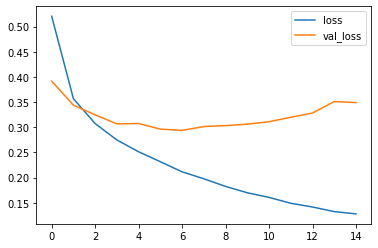

In [14]:
# PLot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

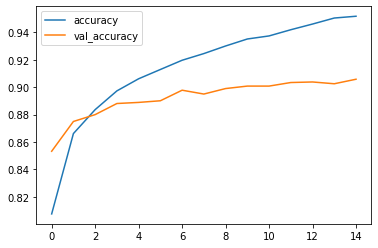

In [15]:
# PLot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[864   0  20  14   2   1  94   0   5   0]
 [  1 974   2  14   2   0   5   0   2   0]
 [ 17   1 856   7  45   0  70   0   4   0]
 [ 22   5  16 913  22   0  20   0   2   0]
 [  0   2  54  27 832   0  83   0   2   0]
 [  0   0   0   0   0 962   0  28   2   8]
 [109   0  52  19  61   0 750   0   9   0]
 [  0   0   0   0   0   5   0 980   1  14]
 [  1   1   3   5   6   2   6   4 972   0]
 [  1   0   0   0   0   5   0  39   0 955]]


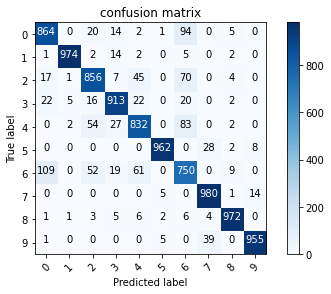

In [16]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix. 
  Normalizeation can be applied by setting 'normalize=True'.
  """

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalize confusion matrix')
  else:
      print("Confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '2.F' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
# Label mapping
labels = '''T-shirt/Top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Anke boot'''.split()

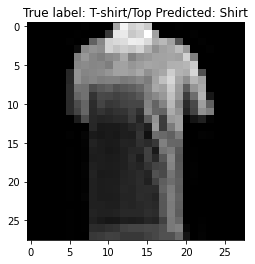

In [19]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));

# **CNN for CFAR-10**

In [25]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [26]:
# number of classes
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


In [0]:
# Build the model using function API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [28]:
# Compile and fit
# Note: make sure you are using th GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5578 - accuracy: 0.4281 - val_loss: 1.2569 - val_accuracy: 0.5381
Epoch 2/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2652 - accuracy: 0.5470 - val_loss: 1.1269 - val_accuracy: 0.6014
Epoch 3/15
1563/1563 [==============================] - 52s 34ms/step - loss: 1.1307 - accuracy: 0.5950 - val_loss: 1.0059 - val_accuracy: 0.6393
Epoch 4/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0357 - accuracy: 0.6295 - val_loss: 1.0076 - val_accuracy: 0.6518
Epoch 5/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9618 - accuracy: 0.6567 - val_loss: 0.8932 - val_accuracy: 0.6865
Epoch 6/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9014 - accuracy: 0.6794 - val_loss: 0.8866 - val_accuracy: 0.6989
Epoch 7/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8544 - accuracy: 0.6953 - val_loss: 0.8457 -

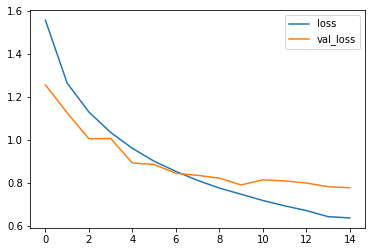

In [29]:
# PLot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

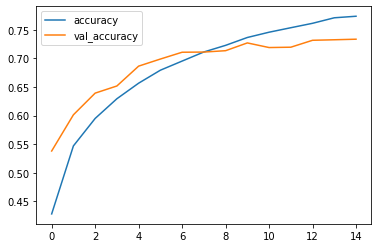

In [30]:
# PLot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[732  11  51  14  37  10  14  16  76  39]
 [ 19 812   5   5   4   6  16   8  26  99]
 [ 55   3 599  57 124  49  63  31  11   8]
 [ 10   2  55 541  80 143 101  41  11  16]
 [ 10   1  50  49 744  26  54  60   5   1]
 [  3   2  48 180  67 580  60  50   3   7]
 [  4   4  29  47  39  12 852   5   5   3]
 [  8   0  22  41  46  43   7 821   1  11]
 [ 44  22  19  10  16   6  14   7 836  26]
 [ 34  47   6  22   9   9  10  22  22 819]]


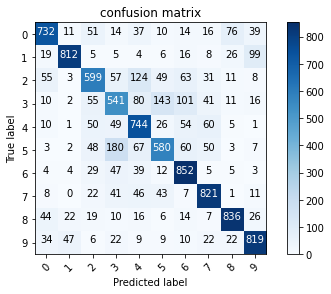

In [31]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix. 
  Normalizeation can be applied by setting 'normalize=True'.
  """

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalize confusion matrix')
  else:
      print("Confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '2.F' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

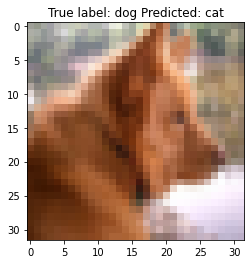

In [37]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));

# **Improving CIFAR-10 Results**

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print('number of classes:', K)

number of classes: 10


### **Using BatchNormalization and MaxPooling2D**

In [0]:
# Build the model using function API
i = Input(shape=x_train[0].shape)
#x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
#x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
#x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3),  activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
#x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3),  activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3),  activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
#x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
#x = Dropout(0.2)(x)

#x = GlobalMaxPoling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3240 - accuracy: 0.5419 - val_loss: 1.1434 - val_accuracy: 0.6068
Epoch 2/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8546 - accuracy: 0.7052 - val_loss: 1.4641 - val_accuracy: 0.5192
Epoch 3/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6972 - accuracy: 0.7560 - val_loss: 0.8548 - val_accuracy: 0.7103
Epoch 4/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5935 - accuracy: 0.7970 - val_loss: 0.6678 - val_accuracy: 0.7775
Epoch 5/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5026 - accuracy: 0.8266 - val_loss: 0.6347 - val_accuracy: 0.7900
Epoch 6/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4234 - accuracy: 0.8537 - val_loss: 0.7012 - val_accuracy: 0.7784
Epoch 7/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3685 - accuracy: 0.8736 - val_loss: 0.5835 -

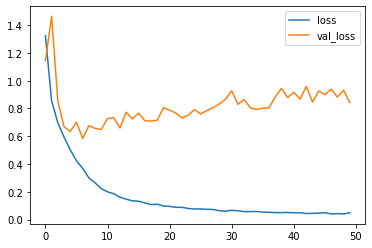

In [8]:
# PLot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

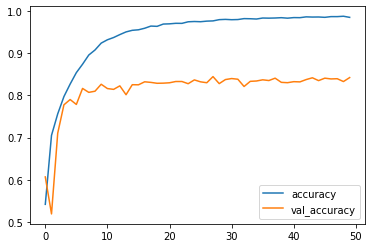

In [9]:
# PLot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

### **Fit with data augmentation**

In [10]:
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where is left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.5574 - accuracy: 0.8235 - val_loss: 0.5829 - val_accuracy: 0.8197
Epoch 2/50
1562/1562 [==============================] - 46s 30ms/step - loss: 0.4434 - accuracy: 0.8533 - val_loss: 0.4838 - val_accuracy: 0.8413
Epoch 3/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.4097 - accuracy: 0.8640 - val_loss: 0.4517 - val_accuracy: 0.8508
Epoch 4/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.3950 - accuracy: 0.8676 - val_loss: 0.4878 - val_accuracy: 0.8455
Epoch 5/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.3799 - accuracy: 0.8728 - val_loss: 0.4247 - val_accuracy: 0.8580
Epoch 6/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.3602 - accuracy: 0.8794 - val_loss: 0.4432 - val_accuracy: 0.8580
Epoch 7/50
1562/1562 [==========================

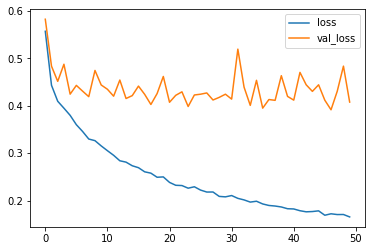

In [11]:
# PLot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

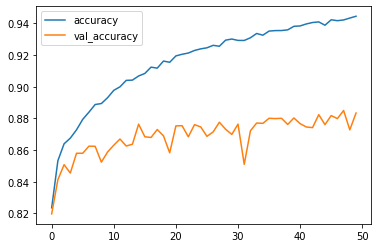

In [12]:
# PLot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[916   6  25   8   6   0   3   3  23  10]
 [  8 968   0   1   0   0   0   1   6  16]
 [ 30   3 851  24  30  25  24   4   4   5]
 [ 17   6  30 752  36  90  33  17   6  13]
 [  8   0  32  25 881  14  20  17   3   0]
 [  9   2  19 111  24 787  20  21   3   4]
 [  8   4  21  27  13   0 916   4   4   3]
 [ 10   2  12  16  23  17   2 911   2   5]
 [ 32   8   2   3   1   2   1   1 934  16]
 [ 10  56   1   2   2   0   2   0   9 918]]


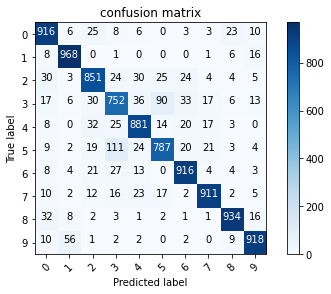

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix. 
  Normalizeation can be applied by setting 'normalize=True'.
  """

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalize confusion matrix')
  else:
      print("Confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '2.F' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

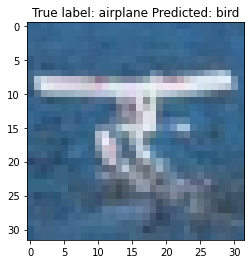

In [24]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));

In [25]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 